# Чувствительность к ошибкам

In [1]:
import os
%pylab
%matplotlib inline
%run ./load_notebook.py

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import scipy.interpolate as inter

In [3]:
import functions

importing Jupyter notebook from functions.ipynb
Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [4]:
Distance = 10.57 # Mpc
incl = 62.
cosi = np.cos(incl / 180. * np.pi)
sini = np.sin(incl / 180. * np.pi)

In [5]:
sigma_s = np.load('./data/sigma_s.npy')
Sigma_H2 = np.load('./data/Sigma_H2.npy')
sigma_HI = np.load('./data/sigma_HI.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
Sigma_s = np.load('./data/Sigma_s.npy')
sig_R_max = np.load('./data/sig_R_max.npy')
sig_R_min = np.load('./data/sig_R_min.npy')
r_HI = np.load('./data/r_HI.npy')
vel_HI = np.load('./data/vel_HI.npy')
kappa = np.load('./data/kappa.npy')
dist_kpc = np.load('./data/dist_kpc.npy')
Qeff_min = np.load('./data/Qeff_min.npy')
Qeff_max = np.load('./data/Qeff_max.npy')
bark = np.load('./data/bark.npy')

In [6]:
velocity_approx = poly1d(polyfit(r_HI, vel_HI, deg=4))

## Варьируем $\Sigma_{H2}$

In [7]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
step = 0
mean_error_min = []
mean_error_max = []
std_error_min = []
std_error_max = []
for percent in np.arange(-35.,40.,5.):
    Sigma_H2_ = (1. + percent/100.) * Sigma_H2
    
    Qeff_max_ = np.zeros(dist_kpc.shape)
    Qeff_min_ = np.zeros(dist_kpc.shape)
    Sigma_g = np.zeros(dist_kpc.shape)
    errors_min = np.zeros(dist_kpc.shape)
    errors_max = np.zeros(dist_kpc.shape)
    
    bugs = 0
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            step+=1
            if step % 1000 == 0:
                print(step)
            c = sigma_HI[i][j]/1000.
            Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2_[i][j])
            kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
            Sigma_s_ = Sigma_s[i][j]
            s_R_max = sig_R_max[i][j]
            s_R_min = sig_R_min[i][j]
            Qg = kappa * c / (math.pi * G * Sigma_g[i][j])
            Qs_max = kappa * s_R_max / (3.36 * G * Sigma_s_)
            Qs_min = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
            Qeff_min_[i][j] = 1./qeff
                
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
            Qeff_max_[i][j] = 1./qeff
         
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            errors_min[i][j] = Qeff_min_[i][j]*100./Qeff_min[i][j] - 100
            errors_max[i][j] = Qeff_max_[i][j]*100./Qeff_max[i][j] - 100
    
    mean_error_min.append(errors_min.mean())
    std_error_min.append(errors_min.std())
    mean_error_max.append(errors_max.mean())
    std_error_max.append(errors_max.std())    
    
    np.save('sens_Qmin_Sigma_H2.npy',mean_error_min)

functions.ipynb:8: RuntimeWarning: invalid value encountered in double_scalars
  ]


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

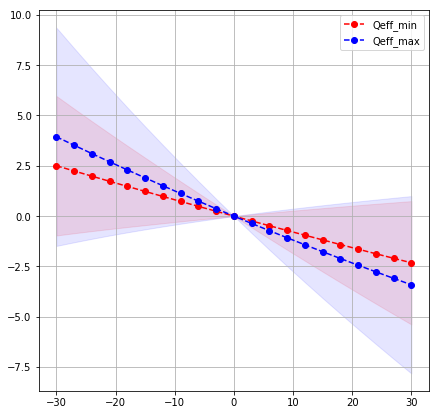

In [8]:
plt.figure(figsize=[7,7])
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_min, 'o--', label='Qeff_min', color='red')
plt.fill_between(np.array(np.arange(-35.,40.,5.)), 
                     np.array(mean_error_min) - np.array(std_error_min), 
                     np.array(std_error_min) + np.array(mean_error_min), alpha=0.1, color='red') 

plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_max, 'o--', label='Qeff_max', color='blue')
plt.fill_between(np.array(np.arange(-35.,40.,5.)), 
                      np.array(mean_error_max) - np.array(std_error_max), 
                     np.array(std_error_max) + np.array(mean_error_max), alpha=0.1, color='blue') 
plt.grid()
plt.legend()

In [8]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
step = 0
mean_error_min = []
std_error_min = []
array_errors = []

for percent in np.arange(-35.,40.,5.):
    Sigma_H2_ = (1. + percent/100.) * Sigma_H2
    Qeff_min_ = np.zeros(dist_kpc.shape)
    Sigma_g = np.zeros(dist_kpc.shape)
    errors_min = np.zeros(dist_kpc.shape)
    errors = []   
    bugs = 0
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            step+=1
            if step % 1000 == 0:
                print(step)
            c = sigma_HI[i][j]/1000.
            Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2_[i][j])
            kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
            Sigma_s_ = Sigma_s[i][j]
            s_R_max = sig_R_max[i][j]
            s_R_min = sig_R_min[i][j]
            Qg = kappa * c / (math.pi * G * Sigma_g[i][j])
            Qs_max = kappa * s_R_max / (3.36 * G * Sigma_s_)
            Qs_min = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
            Qeff_min_[i][j] = 1./qeff
          
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            errors_min[i][j] = Qeff_min_[i][j]*100./Qeff_min[i][j] - 100
            errors.append(Qeff_min_[i][j]*100./Qeff_min[i][j] - 100)
            
    array_errors.append(errors)
    mean_error_min.append(errors_min.mean())
    std_error_min.append(errors_min.std())

    
np.save('./data/mean_error_Sigma_H2.npy',mean_error_min)
np.save('./data/array_errors_Sigma_H2.npy',array_errors)
np.save('./data/std_error_Sigma_H2.npy',std_error_min)
    
    

functions.ipynb:8: RuntimeWarning: invalid value encountered in double_scalars
  ]


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000


In [10]:
print(shape(array_errors))

(15, 10296)


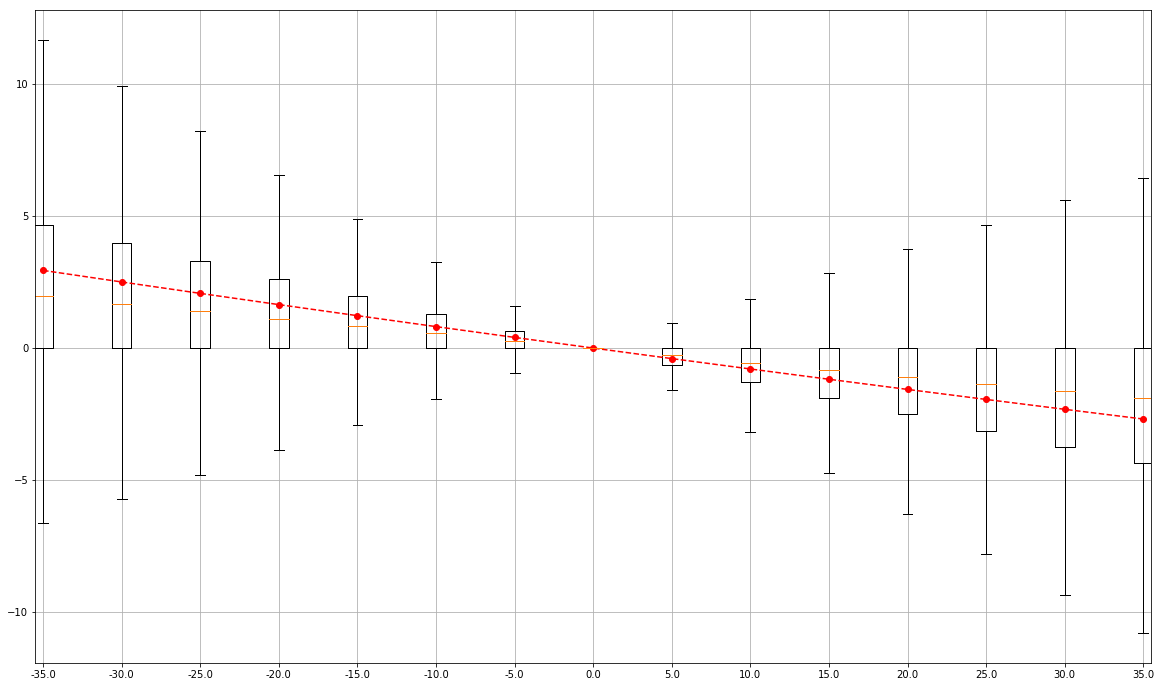

In [11]:

array_errors = np.load('./data/array_errors_Sigma_H2.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(10296,15)
mean_error_min = np.load('./data/mean_error_Sigma_H2.npy')

plt.figure(figsize=[20,12])

plt.boxplot(array_errors, showfliers=False,positions=np.array(np.arange(-35.,40.,5.)), patch_artist =False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_min, 'o--', color='red')
plt.grid()
#plt.ylim(-5, 5.)



## Варьируем $\sigma_{s}^{min}$, $\sigma_{s}^{max}$

In [12]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
step = 0
mean_error_min = []
std_error_min = []
array_errors = []

for percent in np.arange(-35.,40.,5.):
       
    Qeff_min_ = np.zeros(dist_kpc.shape)
    Sigma_g = np.zeros(dist_kpc.shape)
    errors_min = np.zeros(dist_kpc.shape)
    errors = []
    bugs = 0
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            step+=1
            if step % 1000 == 0:
                print(step)
            c = sigma_HI[i][j]/1000.
            Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
            kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
            Sigma_s_ = Sigma_s[i][j]
            s_R_min = (1. + percent/100.) * sig_R_min[i][j]
            Qg = kappa * c / (math.pi * G * Sigma_g[i][j])
            Qs_max = kappa * s_R_max / (3.36 * G * Sigma_s_)
            Qs_min = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
            Qeff_min_[i][j] = 1./qeff
                
                     
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            errors_min[i][j] = Qeff_min_[i][j]*100./Qeff_min[i][j] - 100
            errors.append(Qeff_min_[i][j]*100./Qeff_min[i][j] - 100)
            
    array_errors.append(errors)
    mean_error_min.append(errors_min.mean())
    std_error_min.append(errors_min.std())

    
np.save('./data/mean_error_sigma_s.npy',mean_error_min)
np.save('./data/array_errors_sigma_s.npy',array_errors)
np.save('./data/std_error_sigma_s.npy',std_error_min)    
        

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000


In [20]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
step = 0
mean_error_max = []
std_error_max = []
for percent in np.arange(-35.,40.,5.):
        
    Qeff_max_ = np.zeros(dist_kpc.shape)
    Sigma_g = np.zeros(dist_kpc.shape)
    errors_max = np.zeros(dist_kpc.shape)
    
    bugs = 0
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            step+=1
            if step % 1000 == 0:
                print(step)
            c = sigma_HI[i][j]/1000.
            Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
            kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
            Sigma_s_ = Sigma_s[i][j]
            s_R_min = sig_R_min[i][j]
            s_R_max = (1. + percent/100.) * sig_R_max[i][j]
            Qg = kappa * c / (math.pi * G * Sigma_g[i][j])
            Qs_max = kappa * s_R_max / (3.36 * G * Sigma_s_)
            Qs_min = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
            Qeff_max_[i][j] = 1./qeff
                
                     
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            errors_max[i][j] = Qeff_max_[i][j]*100./Qeff_max[i][j] - 100
                        
    mean_error_max.append(errors_max.mean())
    std_error_max.append(errors_max.std())

    
#np.save('./data/mean_error_sigma_s.npy',mean_error_min)
#np.save('./data/std_error_sigma_s.npy',std_error_min)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000


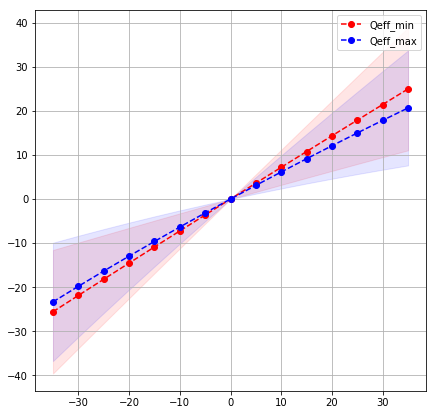

In [21]:
plt.figure(figsize=[7,7])
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_min, 'o--', label='Qeff_min', color='red')
plt.fill_between(np.array(np.arange(-35.,40.,5.)), 
                     np.array(mean_error_min) - np.array(std_error_min), 
                     np.array(std_error_min) + np.array(mean_error_min), alpha=0.1, color='red') 

plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_max, 'o--', label='Qeff_max', color='blue')
plt.fill_between(np.array(np.arange(-35.,40.,5.)), 
                      np.array(mean_error_max) - np.array(std_error_max), 
                     np.array(std_error_max) + np.array(mean_error_max), alpha=0.1, color='blue') 
plt.grid()
plt.legend()

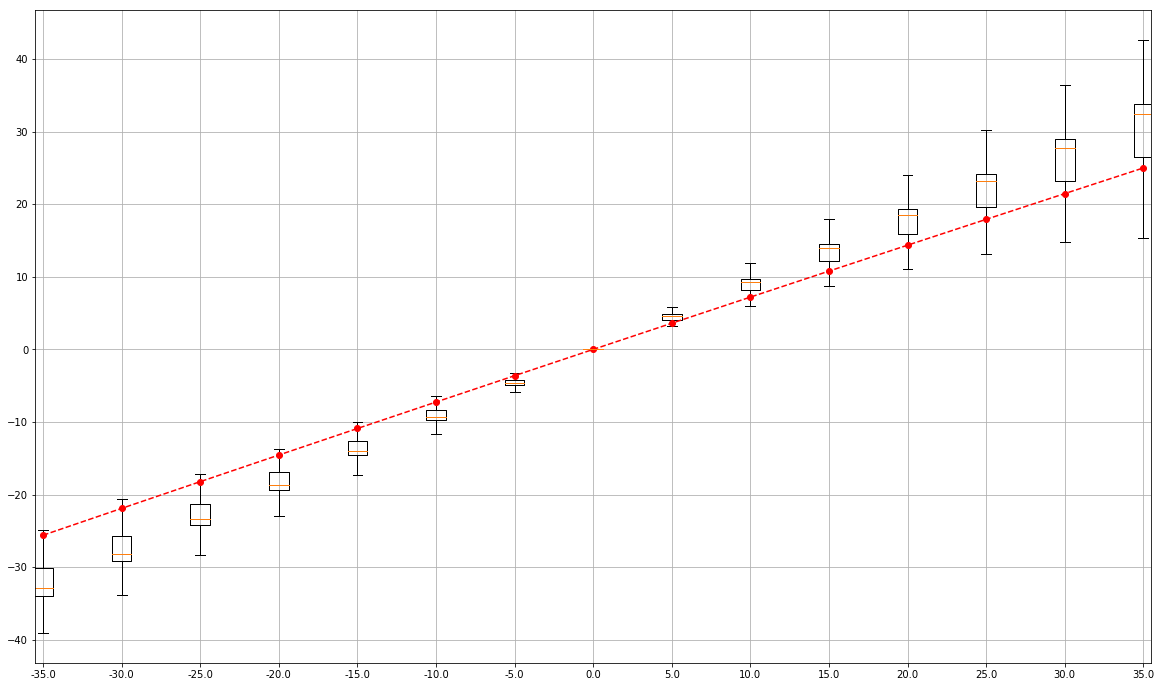

In [13]:

array_errors = np.load('./data/array_errors_sigma_s.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(10296,15)
mean_error_min  =  np.load('./data/mean_error_sigma_s.npy')
plt.figure(figsize=[20,12])

plt.boxplot(array_errors,showfliers=False, positions=np.array(np.arange(-35.,40.,5.)),patch_artist = False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_min, 'o--', color='red')
plt.grid()
#plt.ylim(-5, 5.)


## Варьируем $\Sigma_{HI}$

In [23]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
step = 0
mean_error_min = []
mean_error_max = []
std_error_min = []
std_error_max = []
for percent in np.arange(-35.,40.,5.):
    Sigma_HI_ = (1. + percent/100.) * Sigma_HI
    
    Qeff_max_ = np.zeros(dist_kpc.shape)
    Qeff_min_ = np.zeros(dist_kpc.shape)
    Sigma_g = np.zeros(dist_kpc.shape)
    errors_min = np.zeros(dist_kpc.shape)
    errors_max = np.zeros(dist_kpc.shape)
    
    bugs = 0
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            step+=1
            if step % 1000 == 0:
                print(step)
            c = sigma_HI[i][j]/1000.
            Sigma_g[i][j] = 1.36*(Sigma_HI_[i][j] + Sigma_H2[i][j])
            kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
            Sigma_s_ = Sigma_s[i][j]
            s_R_max = sig_R_max[i][j]
            s_R_min = sig_R_min[i][j]
            Qg = kappa * c / (math.pi * G * Sigma_g[i][j])
            Qs_max = kappa * s_R_max / (3.36 * G * Sigma_s_)
            Qs_min = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
            Qeff_min_[i][j] = 1./qeff
                
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
            Qeff_max_[i][j] = 1./qeff
         
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            errors_min[i][j] = (Qeff_min_[i][j]*100.)/Qeff_min[i][j] - 100
            errors_max[i][j] = (Qeff_max_[i][j]*100.)/Qeff_max[i][j] - 100
            
    mean_error_min.append(errors_min.mean())
    mean_error_max.append(errors_max.mean())
    std_error_min.append(errors_min.std())
    std_error_max.append(errors_max.std())
    
np.save('./data/mean_error_Sigma_HI.npy',mean_error_min)
np.save('./data/std_error_Sigma_HI.npy',std_error_min)    

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000


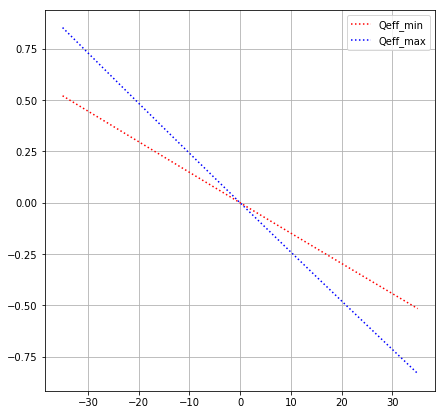

In [24]:
plt.figure(figsize=[7,7])
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_min, ':', label='Qeff_min', color='red')
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_max, ':', label='Qeff_max', color='blue')
plt.grid()
plt.legend()

In [7]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
step = 0
mean_error_min = []
std_error_min = []
array_errors = []
array_bark = []
for percent in np.arange(-35.,40.,5.):
    Sigma_HI_ = (1. + percent/100.) * Sigma_HI
    
    Qeff_max_ = np.zeros(dist_kpc.shape)
    bark_ = np.zeros(dist_kpc.shape)
    Qeff_min_ = np.zeros(dist_kpc.shape)
    Sigma_g = np.zeros(dist_kpc.shape)
    errors_min = np.zeros(dist_kpc.shape)
    errors_max = np.zeros(dist_kpc.shape)
    errors = []
    errors_bark = []
    bugs = 0
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            step+=1
            if step % 1000 == 0:
                print(step)
            c = sigma_HI[i][j]/1000.
            Sigma_g[i][j] = 1.36*(Sigma_HI_[i][j] + Sigma_H2[i][j])
            kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
            Sigma_s_ = Sigma_s[i][j]
            s_R_max = sig_R_max[i][j]
            s_R_min = sig_R_min[i][j]
            Qg = kappa * c / (math.pi * G * Sigma_g[i][j])
            Qs_max = kappa * s_R_max / (3.36 * G * Sigma_s_)
            Qs_min = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
                root = -1.
            Qeff_min_[i][j] = 1./qeff
            bark_[i][j] = root   
                     
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            errors_min[i][j] = Qeff_min_[i][j]*100./Qeff_min[i][j] - 100
            errors.append(Qeff_min_[i][j]*100./Qeff_min[i][j] - 100)
            errors_bark.append(bark_[i][j]*100./bark[i][j] - 100)
            
            
    array_errors.append(errors)
    mean_error_min.append(errors_min.mean())
    std_error_min.append(errors_min.std())
    array_bark.append(errors_bark)
    
np.save('./data/mean_error_Sigma_HI.npy',mean_error_min)
np.save('./data/array_errors_Sigma_HI.npy',array_errors)
np.save('./data/std_error_Sigma_HI.npy',std_error_min)

functions.ipynb:8: RuntimeWarning: invalid value encountered in double_scalars
  ]


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000


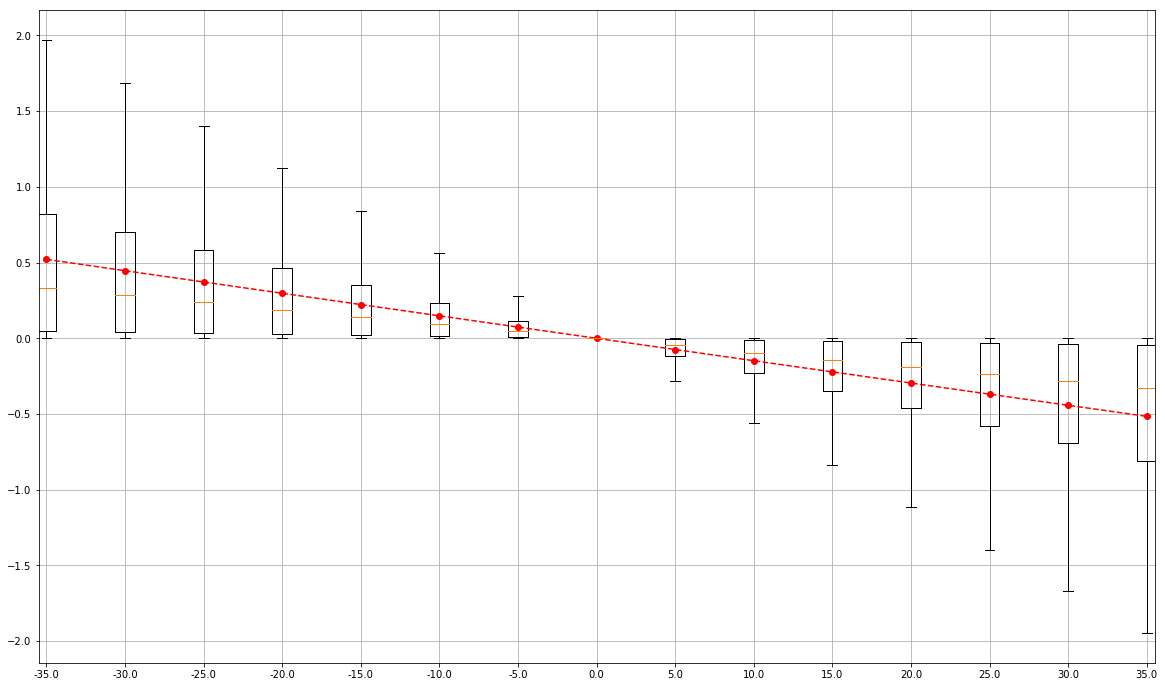

In [15]:
array_errors = np.load('./data/array_errors_Sigma_HI.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(10296,15)
mean_error_min  =  np.load('./data/mean_error_Sigma_HI.npy')
plt.figure(figsize=[20,12])

plt.boxplot(array_errors,positions=np.array(np.arange(-35.,40.,5.)),showfliers=False, patch_artist =False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_min, 'o--', color='red')
plt.grid()
#plt.ylim(-5, 5.)

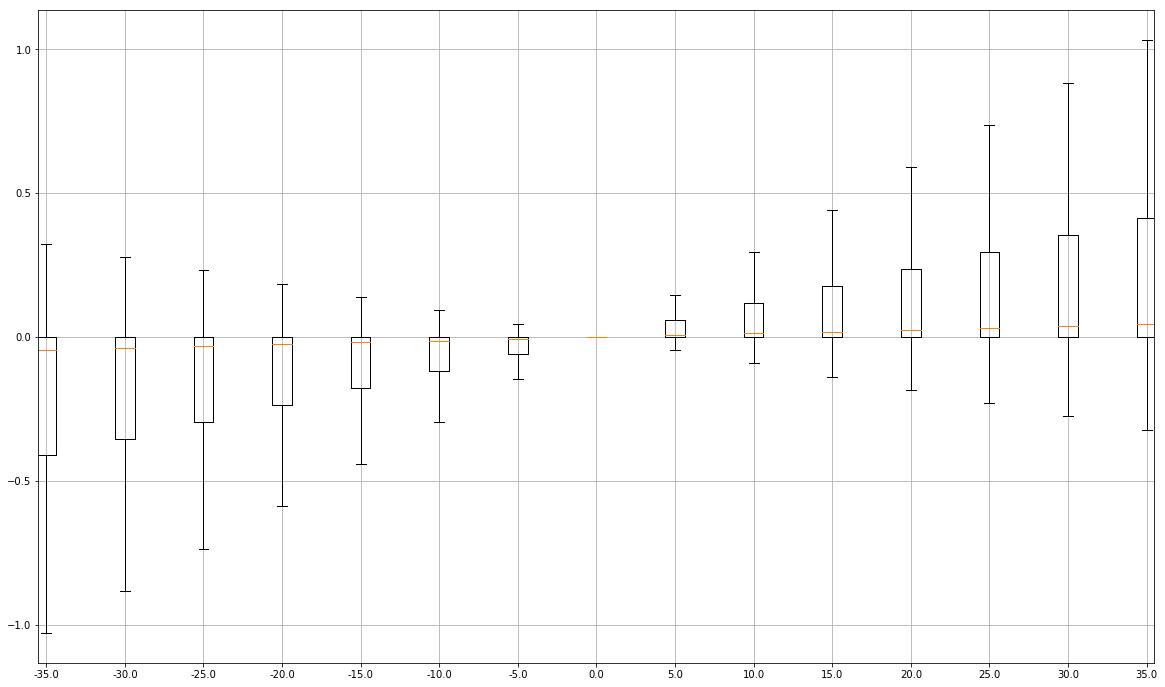

In [8]:
plt.figure(figsize=[20,12])

plt.boxplot(array_bark,positions=np.array(np.arange(-35.,40.,5.)),showfliers=False, patch_artist =False, widths = 1.25) 
plt.grid()

## Варьируем $\sigma_{HI}$ 

In [8]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
step = 0
mean_error_min = []
mean_error_max = []
std_error_min = []
std_error_max = []
for percent in np.arange(-35.,40.,5.):  
    
    Qeff_max_ = np.zeros(dist_kpc.shape)
    Qeff_min_ = np.zeros(dist_kpc.shape)
    Sigma_g = np.zeros(dist_kpc.shape)
    errors_min = np.zeros(dist_kpc.shape)
    errors_max = np.zeros(dist_kpc.shape)
    
    bugs = 0
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            step+=1
            if step % 1000 == 0:
                print(step)
            c = (sigma_HI[i][j]/1000.) * (1. + percent/100.)
            Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
            kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
            Sigma_s_ = Sigma_s[i][j]
            s_R_max = sig_R_max[i][j]
            s_R_min = sig_R_min[i][j]
            Qg = kappa * c / (math.pi * G * Sigma_g[i][j])
            Qs_max = kappa * s_R_max / (3.36 * G * Sigma_s_)
            Qs_min = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
            Qeff_min_[i][j] = 1./qeff
                
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
            Qeff_max_[i][j] = 1./qeff
         
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            errors_min[i][j] = (Qeff_min_[i][j]*100.)/Qeff_min[i][j] - 100
            errors_max[i][j] = (Qeff_max_[i][j]*100.)/Qeff_max[i][j] - 100
    
    mean_error_min.append(errors_min.mean())
    mean_error_max.append(errors_max.mean())
    std_error_min.append(errors_min.std())
    std_error_max.append(errors_max.std())
    
np.save('./data/mean_error_sigma_HI.npy',mean_error_min)
np.save('./data/std_error_sigma_HI.npy',std_error_min)

functions.ipynb:8: RuntimeWarning: invalid value encountered in double_scalars
  ]


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000


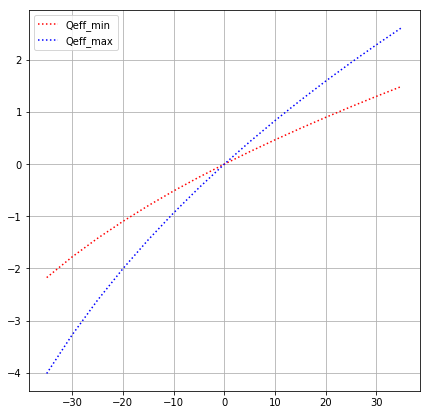

In [9]:
plt.figure(figsize=[7,7])
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_min, ':', label='Qeff_min', color='red')
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_max, ':', label='Qeff_max', color='blue')
plt.grid()
plt.legend()

In [16]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
step = 0
mean_error_min = []
std_error_min = []
array_errors = []

for percent in np.arange(-35.,40.,5.):
    
    Qeff_max_ = np.zeros(dist_kpc.shape)
    Qeff_min_ = np.zeros(dist_kpc.shape)
    Sigma_g = np.zeros(dist_kpc.shape)
    errors_min = np.zeros(dist_kpc.shape)
    errors_max = np.zeros(dist_kpc.shape)
    errors = []
    bugs = 0
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            step+=1
            if step % 1000 == 0:
                print(step)
            c = (sigma_HI[i][j]/1000.) * (1. + percent/100.)
            Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
            kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
            Sigma_s_ = Sigma_s[i][j]
            s_R_max = sig_R_max[i][j]
            s_R_min = sig_R_min[i][j]
            Qg = kappa * c / (math.pi * G * Sigma_g[i][j])
            Qs_max = kappa * s_R_max / (3.36 * G * Sigma_s_)
            Qs_min = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
            Qeff_min_[i][j] = 1./qeff
                
                     
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            errors_min[i][j] = Qeff_min_[i][j]*100./Qeff_min[i][j] - 100
            errors.append(Qeff_min_[i][j]*100./Qeff_min[i][j] - 100)
            
    array_errors.append(errors)
    mean_error_min.append(errors_min.mean())
    std_error_min.append(errors_min.std())

    
np.save('./data/mean_error_sigma_HI.npy',mean_error_min)
np.save('./data/array_errors_sigma_HI.npy',array_errors)
np.save('./data/std_error_sigma_HI.npy',std_error_min)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000


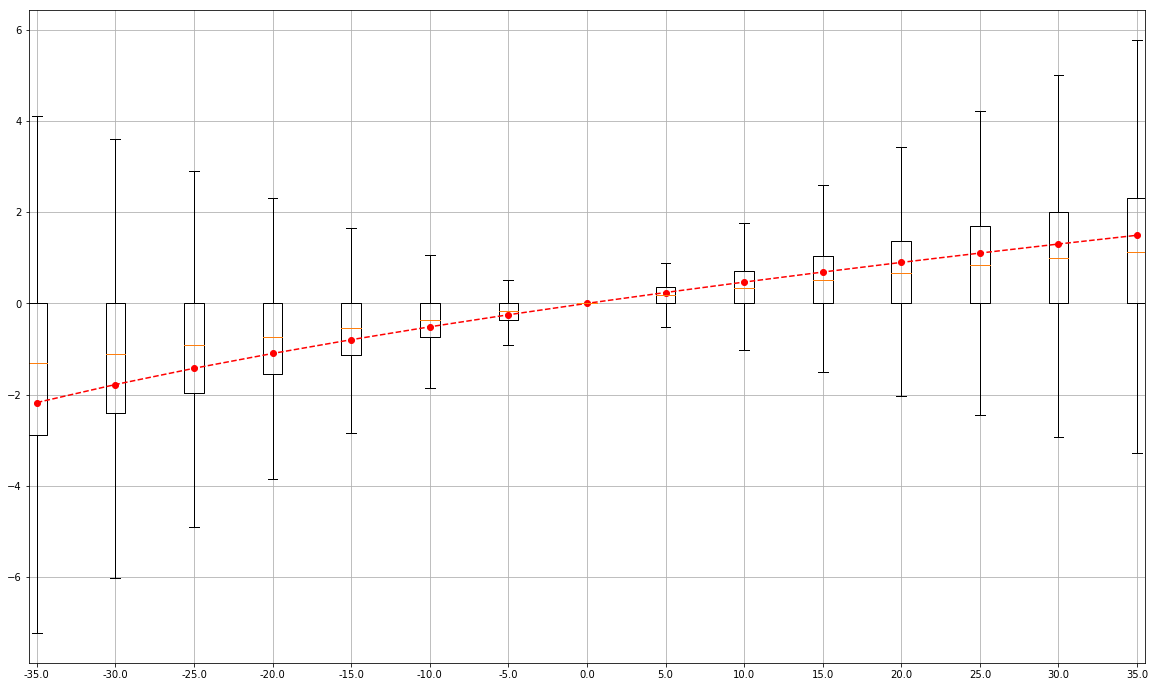

In [17]:
array_errors = np.load('./data/array_errors_sigma_HI.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(10296,15)
mean_error_min  =  np.load('./data/mean_error_sigma_HI.npy')
plt.figure(figsize=[20,12])

plt.boxplot(array_errors,positions=np.array(np.arange(-35.,40.,5.)),showfliers=False, patch_artist =False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_min, 'o--', color='red')
plt.grid()

## Варьируем кривую вращения

In [17]:

dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
step = 0
mean_error_min = []
mean_error_max = []
for percent in np.arange(-35.,40.,5.):  
    
    vel_HI_ = (1. + percent/100.) * vel_HI
    velocity_approx1 = poly1d(polyfit(r_HI, vel_HI_, deg=4))
    
    Qeff_max_ = np.zeros(dist_kpc.shape)
    Qeff_min_ = np.zeros(dist_kpc.shape)
    Sigma_g = np.zeros(dist_kpc.shape)
    errors_min = np.zeros(dist_kpc.shape)
    errors_max = np.zeros(dist_kpc.shape)
    
    bugs = 0
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            step+=1
            if step % 1000 == 0:
                print(step)
            c = sigma_HI[i][j]/1000.
            Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
            kappa = functions.epic_freq(velocity_approx1, dist_kpc[i][j], dR)
            Sigma_s_ = Sigma_s[i][j]
            s_R_max = sig_R_max[i][j]
            s_R_min = sig_R_min[i][j]
            Qg = kappa * c / (math.pi * G * Sigma_g[i][j])
            Qs_max = kappa * s_R_max / (3.36 * G * Sigma_s_)
            Qs_min = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
            Qeff_min_[i][j] = 1./qeff
                
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
            Qeff_max_[i][j] = 1./qeff
         
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            errors_min[i][j] = abs((Qeff_min_[i][j]*100.)/Qeff_min[i][j] - 100)
            errors_max[i][j] = abs((Qeff_max_[i][j]*100.)/Qeff_max[i][j] - 100)
    
    mean_error_min.append(np.sum(errors_min)/10075.)
    mean_error_max.append(np.sum(errors_max)/10075.)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000


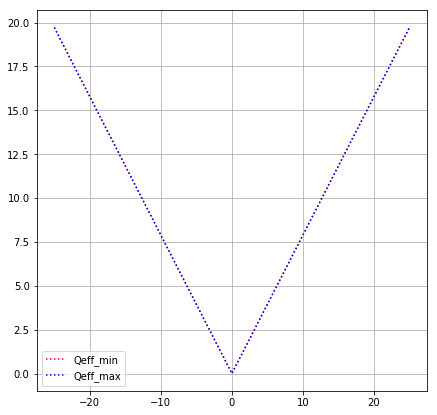

In [18]:
plt.figure(figsize=[7,7])
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_min, ':', label='Qeff_min', color='red')
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_max, ':', label='Qeff_max', color='blue')
plt.grid()
plt.legend()

## Варьируем $\Sigma_s$

In [12]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
step = 0
mean_error_min = []
mean_error_max = []
for percent in np.arange(-35.,40.,5.):  
        
    Qeff_max_ = np.zeros(dist_kpc.shape)
    Qeff_min_ = np.zeros(dist_kpc.shape)
    Sigma_g = np.zeros(dist_kpc.shape)
    errors_min = np.zeros(dist_kpc.shape)
    errors_max = np.zeros(dist_kpc.shape)
    
    bugs = 0
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            step+=1
            if step % 1000 == 0:
                print(step)
            c = sigma_HI[i][j]/1000.
            Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
            kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
            Sigma_s_ = (1 + percent/100.)*Sigma_s[i][j]
            s_R_max = sig_R_max[i][j]
            s_R_min = sig_R_min[i][j]
            Qg = kappa * c / (math.pi * G * Sigma_g[i][j])
            Qs_max = kappa * s_R_max / (3.36 * G * Sigma_s_)
            Qs_min = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
            Qeff_min_[i][j] = 1./qeff
                
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
            Qeff_max_[i][j] = 1./qeff
         
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            errors_min[i][j] = (Qeff_min_[i][j]*100.)/Qeff_min[i][j] - 100
            errors_max[i][j] = (Qeff_max_[i][j]*100.)/Qeff_max[i][j] - 100
    
    mean_error_min.append(errors_min.mean())
    mean_error_max.append(errors_max.mean())
    std_error_min.append(errors_min.std())
    std_error_max.append(errors_max.std())
    
np.save('mean_error_Sigma_s.npy',mean_error_min)
np.save('std_error_Sigma_s',std_error_min)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000


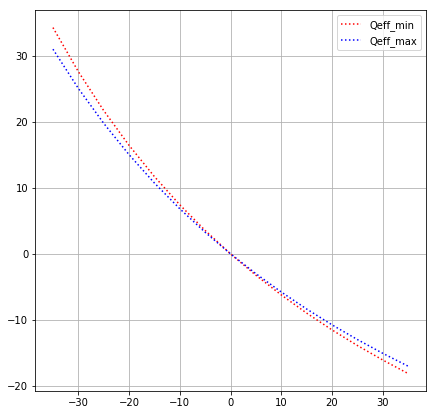

In [13]:
plt.figure(figsize=[7,7])
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_min, ':', label='Qeff_min', color='red')
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_max, ':', label='Qeff_max', color='blue')
plt.grid()
plt.legend()

In [18]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
step = 0
mean_error_min = []
std_error_min = []
array_errors = []

for percent in np.arange(-35.,40.,5.):
    
    Qeff_max_ = np.zeros(dist_kpc.shape)
    Qeff_min_ = np.zeros(dist_kpc.shape)
    Sigma_g = np.zeros(dist_kpc.shape)
    errors_min = np.zeros(dist_kpc.shape)
    errors_max = np.zeros(dist_kpc.shape)
    errors = []
    bugs = 0
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            step+=1
            if step % 1000 == 0:
                print(step)
            c = sigma_HI[i][j]/1000.
            Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
            kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
            Sigma_s_ = (1 + percent/100.)*Sigma_s[i][j]
            s_R_max = sig_R_max[i][j]
            s_R_min = sig_R_min[i][j]
            Qg = kappa * c / (math.pi * G * Sigma_g[i][j])
            Qs_max = kappa * s_R_max / (3.36 * G * Sigma_s_)
            Qs_min = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
            Qeff_min_[i][j] = 1./qeff
                
                     
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            errors_min[i][j] = Qeff_min_[i][j]*100./Qeff_min[i][j] - 100
            errors.append(Qeff_min_[i][j]*100./Qeff_min[i][j] - 100)
            
    array_errors.append(errors)
    mean_error_min.append(errors_min.mean())
    std_error_min.append(errors_min.std())

    
np.save('./data/mean_error_Sigma_s.npy',mean_error_min)
np.save('./data/array_errors_Sigma_s.npy',array_errors)
np.save('./data/std_error_Sigma_s.npy',std_error_min)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000


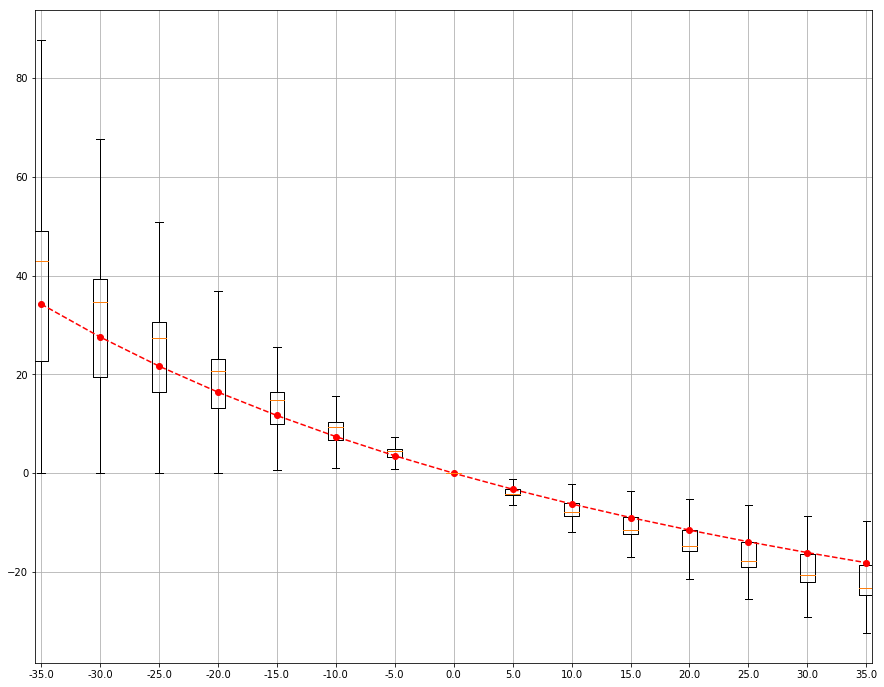

In [20]:
array_errors = np.load('./data/array_errors_Sigma_s.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(10296,15)
mean_error_min  =  np.load('./data/mean_error_Sigma_s.npy')
plt.figure(figsize=[15,12])

plt.boxplot(array_errors,positions=np.array(np.arange(-35.,40.,5.)),showfliers=False, patch_artist =False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_min, 'o--', color='red')
plt.grid()

In [21]:
mean_error_Sigma_s = np.load('./data/mean_error_Sigma_s.npy')
mean_error_Sigma_HI = np.load('./data/mean_error_Sigma_HI.npy')
mean_error_sigma_s = np.load('./data/mean_error_sigma_s.npy')
mean_error_Sigma_H2 = np.load('./data/mean_error_Sigma_H2.npy')
mean_error_sigma_HI = np.load('./data/mean_error_sigma_HI.npy')

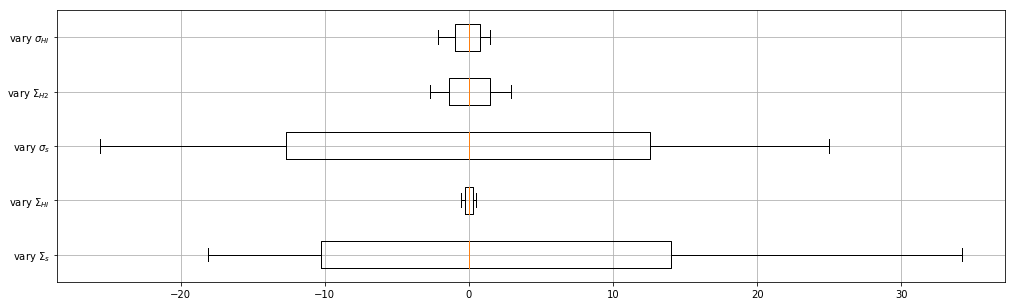

In [22]:
array = [mean_error_Sigma_s,mean_error_Sigma_HI,mean_error_sigma_s,mean_error_Sigma_H2,mean_error_sigma_HI]
plt.figure(figsize=[17,5])
plt.boxplot(array,showfliers=False, vert=False, labels=[r'vary $\Sigma_s$',r'vary $\Sigma_{HI}$',r'vary $\sigma_s$',
                                            r'vary $\Sigma_{H2}$', r'vary $\sigma_{HI}$'] )

plt.grid()

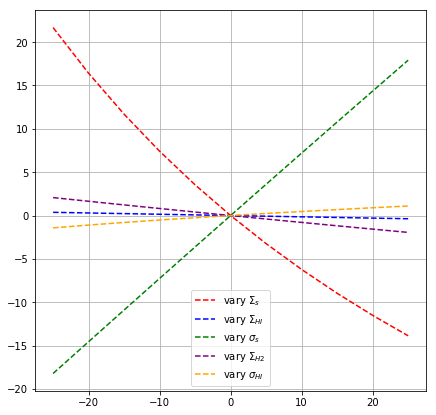

In [106]:
plt.figure(figsize=[7,7])
plt.plot(np.array(np.arange(-25.,30.,5.)),mean_error_Sigma_s, '--', label=r'vary $\Sigma_s$', color='red')
plt.plot(np.array(np.arange(-25.,30.,5.)),mean_error_Sigma_HI, '--', label=r'vary $\Sigma_{HI}$', color='blue')
plt.plot(np.array(np.arange(-25.,30.,5.)),mean_error_sigma_s, '--', label=r'vary $\sigma_s$', color='green')
plt.plot(np.array(np.arange(-25.,30.,5.)),mean_error_Sigma_H2, '--', label=r'vary $\Sigma_{H2}$', color='purple')
plt.plot(np.array(np.arange(-25.,30.,5.)),mean_error_sigma_HI, '--', label=r'vary $\sigma_{HI}$', color='orange')
plt.grid()
plt.legend()

In [ ]:
Sigma_H2_five_up = 1.05 * Sigma_H2 
Sigma_H2_five_down = 0.95 * Sigma_H2

In [125]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
Qeff_max_five_up = np.zeros(dist_kpc.shape)
Qeff_max_five_down = np.zeros(dist_kpc.shape)
Qeff_min_five_up = np.zeros(dist_kpc.shape)
Qeff_min_five_down = np.zeros(dist_kpc.shape)
bark = np.zeros(dist_kpc.shape)
bark_max = np.zeros(dist_kpc.shape)
Qg = np.zeros(dist_kpc.shape)
Qs_min = np.zeros(dist_kpc.shape)
Qs_max = np.zeros(dist_kpc.shape)
Sigma_g = np.zeros(dist_kpc.shape)

step = 0
errors = 0
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2_five_up[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min_five_up[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max_five_up[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
        
        
print('Errors:{}'.format(errors))

functions.ipynb:8: RuntimeWarning: invalid value encountered in double_scalars
  ]


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Errors:4704


In [126]:
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2_five_down[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min_five_down[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max_five_down[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
        
        
print('Errors:{}'.format(errors))

11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
Errors:9408


Text(0.5, 1.0, '$Q_{eff}^{min}+5\\%$')

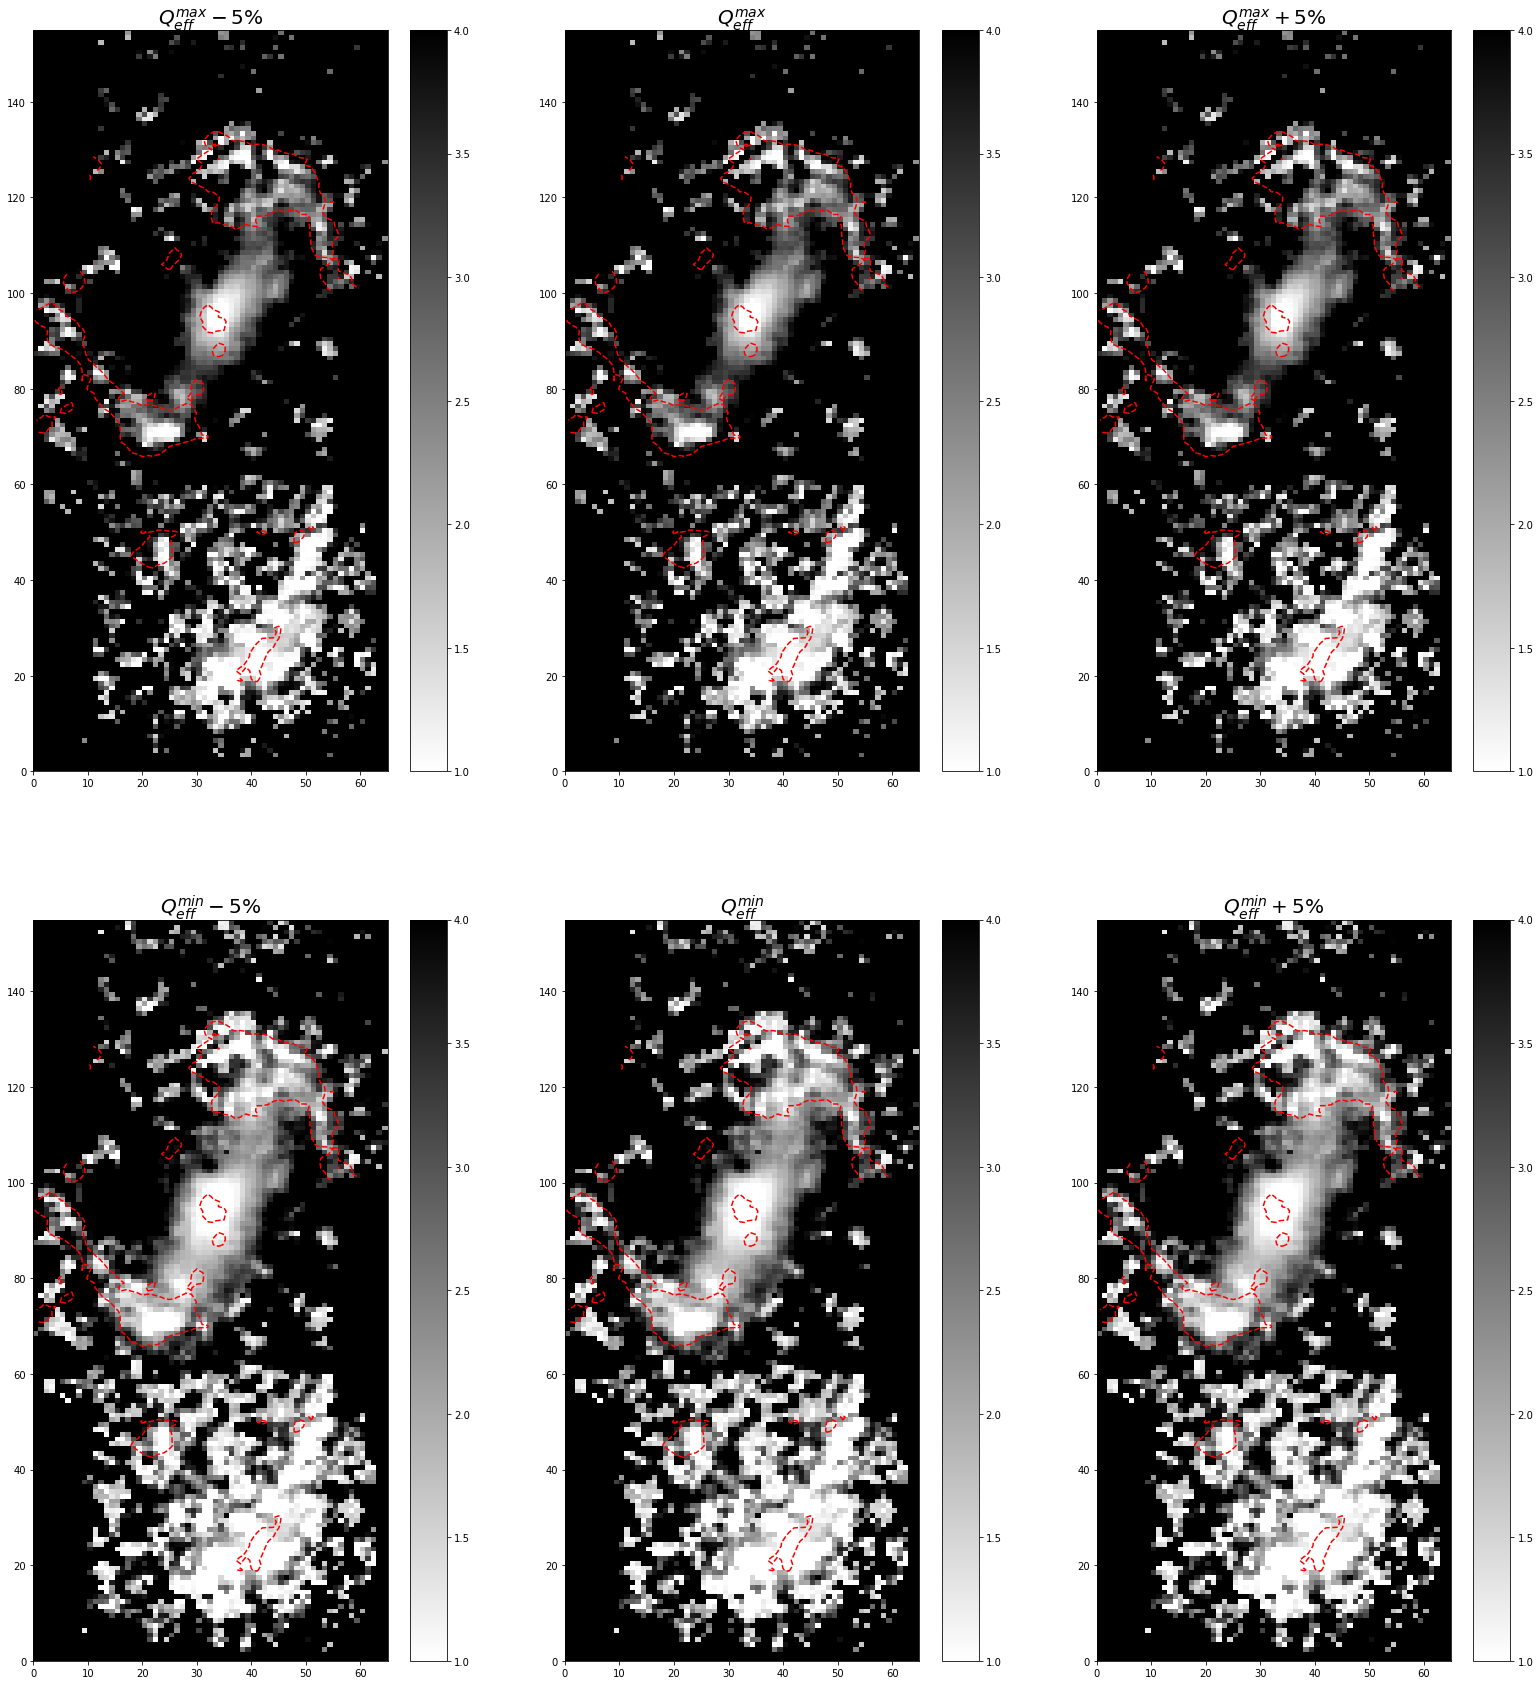

In [130]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[27, 30])
plt.subplot(2,3,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max_five_down, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}-5\%$', fontsize=20)

plt.subplot(2,3,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)

plt.subplot(2,3,3)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max_five_up, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}+5\%$', fontsize=20)

plt.subplot(2,3,4)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min_five_down, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}-5\%$', fontsize=20)

plt.subplot(2,3,5)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(2,3,6)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min_five_up, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}+5\%$', fontsize=20)

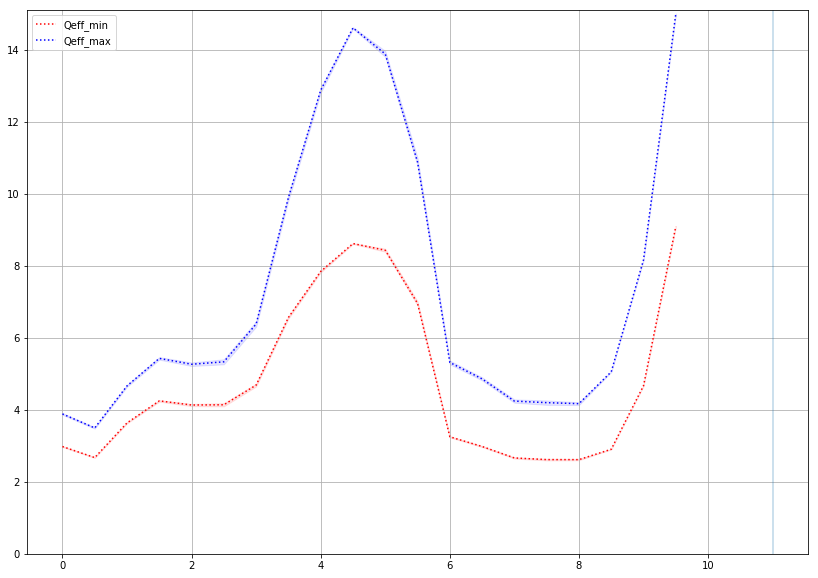

In [145]:
plt.figure(figsize=[14,10])
Qeff_min_az = azimuthal_average(Qeff_min, step=0.5, vmax=10.)[0]
Qeff_min_az_up = azimuthal_average(Qeff_min_five_up, step=0.5, vmax=10.)[0]
Qeff_min_az_down = azimuthal_average(Qeff_min_five_down, step=0.5, vmax=10.)[0]
Qeff_max_az = azimuthal_average(Qeff_max, step=0.5, vmax=10.)[0]
Qeff_max_az_up = azimuthal_average(Qeff_max_five_up, step=0.5, vmax=10.)[0]
Qeff_max_az_down = azimuthal_average(Qeff_max_five_down, step=0.5, vmax=10.)[0]

plt.plot(np.array(np.arange(0,10.,0.5)),Qeff_min_az, ':', label='Qeff_min', color='red')
plt.fill_between(np.array(np.arange(0,10.,0.5)), 
                     np.array(Qeff_min_az_up), 
                     np.array(Qeff_min_az_down), alpha=0.1, color='red') 

plt.plot(np.array(np.arange(0,10.,0.5)),Qeff_max_az, ':', label='Qeff_max', color='blue')
plt.fill_between(np.array(np.arange(0,10.,0.5)), 
                     np.array(Qeff_max_az_up), 
                     np.array(Qeff_max_az_down), alpha=0.1, color='blue') 


plt.grid()
plt.legend()
plt.axvline(x=11., alpha=0.3)
plt.ylim(0, 15.1);

In [131]:
Sigma_H2_ten_up = 1.1 * Sigma_H2 
Sigma_H2_ten_down = 0.9 * Sigma_H2

In [132]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
Qeff_max_ten_up = np.zeros(dist_kpc.shape)
Qeff_max_ten_down = np.zeros(dist_kpc.shape)
Qeff_min_ten_up = np.zeros(dist_kpc.shape)
Qeff_min_ten_down = np.zeros(dist_kpc.shape)
bark = np.zeros(dist_kpc.shape)
bark_max = np.zeros(dist_kpc.shape)
Qg = np.zeros(dist_kpc.shape)
Qs_min = np.zeros(dist_kpc.shape)
Qs_max = np.zeros(dist_kpc.shape)
Sigma_g = np.zeros(dist_kpc.shape)

step = 0
errors = 0
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2_ten_up[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min_ten_up[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max_ten_up[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
        
        
print('Errors:{}'.format(errors))

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Errors:4704


In [133]:
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2_ten_down[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min_ten_down[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max_ten_down[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
        
        
print('Errors:{}'.format(errors))

11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
Errors:9408


Text(0.5, 1.0, '$Q_{eff}^{min}+10\\%$')

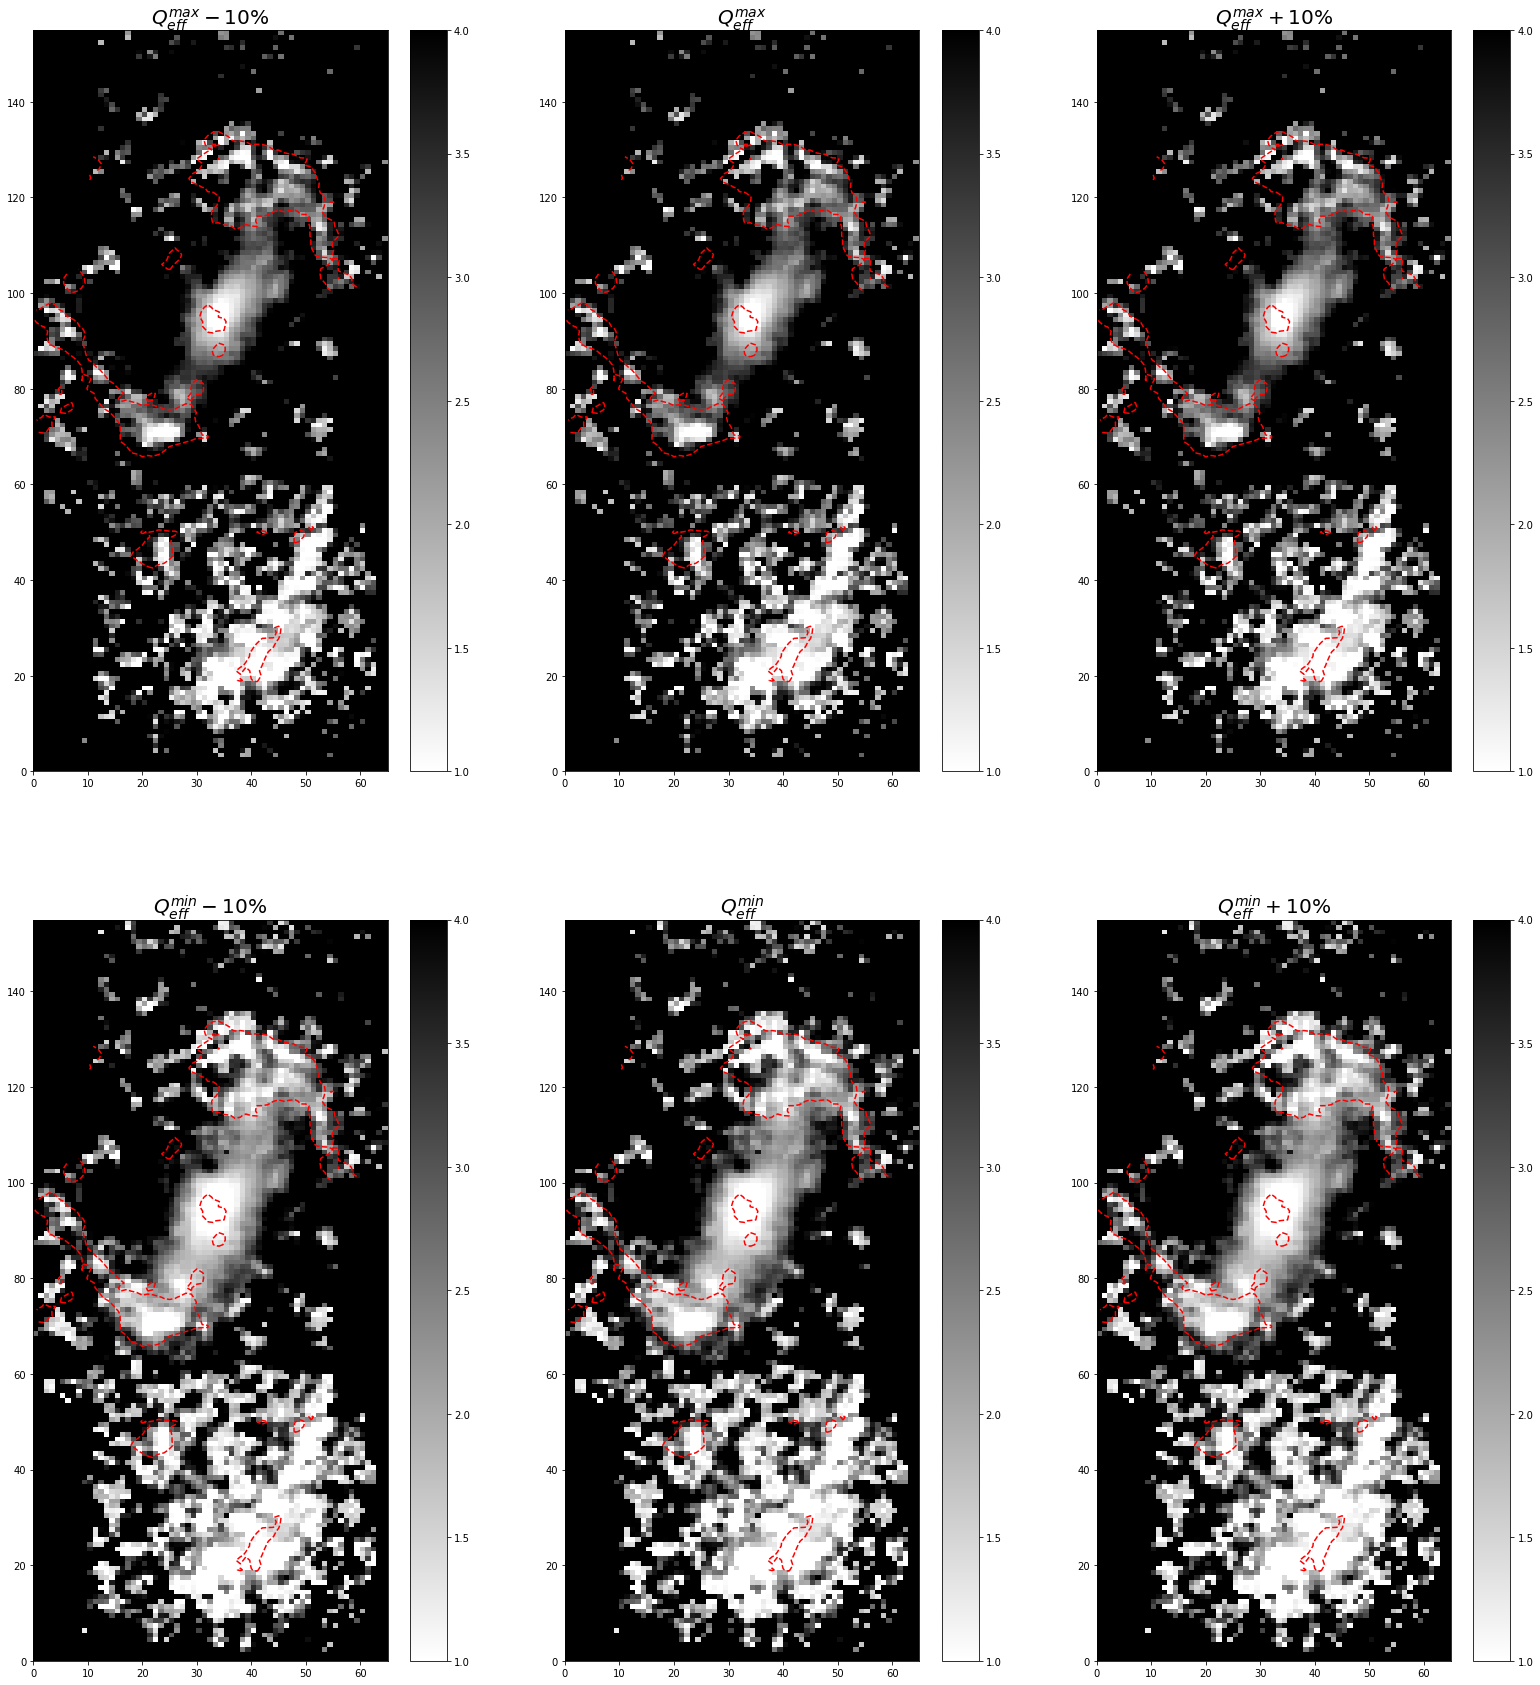

In [134]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[27, 30])
plt.subplot(2,3,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max_ten_down, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}-10\%$', fontsize=20)

plt.subplot(2,3,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)

plt.subplot(2,3,3)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max_ten_up, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}+10\%$', fontsize=20)

plt.subplot(2,3,4)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min_ten_down, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}-10\%$', fontsize=20)

plt.subplot(2,3,5)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(2,3,6)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min_ten_up, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}+10\%$', fontsize=20)

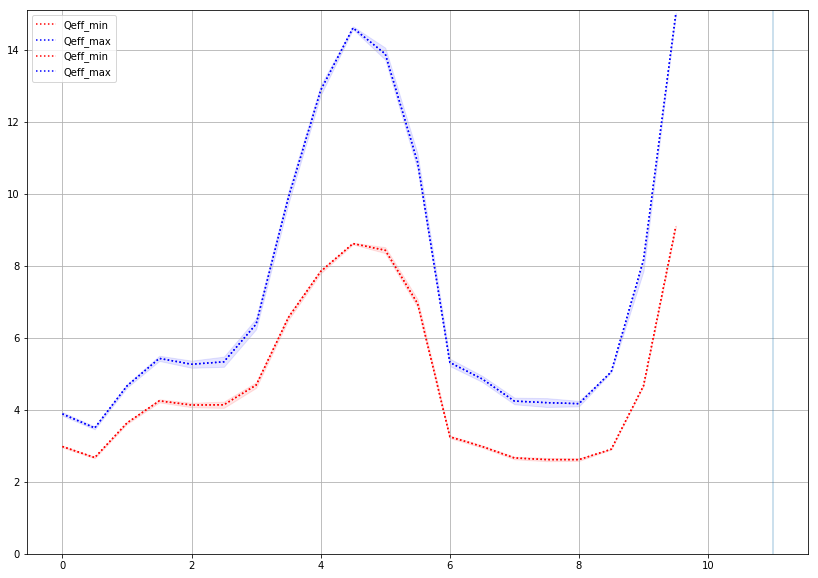

In [136]:
plt.figure(figsize=[14,10])
for ind, Q in enumerate([Qeff_min, Qeff_max]):
    label = ['Qeff_min', 'Qeff_max'][ind]
    color = ['r', 'blue'][ind]
    az_av, az_dev = azimuthal_average(Q, step=0.5, vmax=10.)
    plt.plot(np.array(np.arange(0,10.,0.5)), az_av, ':', label=label, color=color)
    
Qeff_min_az = azimuthal_average(Qeff_min, step=0.5, vmax=10.)[0]
Qeff_min_az_up = azimuthal_average(Qeff_min_ten_up, step=0.5, vmax=10.)[0]
Qeff_min_az_down = azimuthal_average(Qeff_min_ten_down, step=0.5, vmax=10.)[0]
Qeff_max_az = azimuthal_average(Qeff_max, step=0.5, vmax=10.)[0]
Qeff_max_az_up = azimuthal_average(Qeff_max_ten_up, step=0.5, vmax=10.)[0]
Qeff_max_az_down = azimuthal_average(Qeff_max_ten_down, step=0.5, vmax=10.)[0]

plt.plot(np.array(np.arange(0,10.,0.5)),Qeff_min_az, ':', label='Qeff_min', color='red')
plt.fill_between(np.array(np.arange(0,10.,0.5)), 
                     np.array(Qeff_min_az_up), 
                     np.array(Qeff_min_az_down), alpha=0.1, color='red') 

plt.plot(np.array(np.arange(0,10.,0.5)),Qeff_max_az, ':', label='Qeff_max', color='blue')
plt.fill_between(np.array(np.arange(0,10.,0.5)), 
                     np.array(Qeff_max_az_up), 
                     np.array(Qeff_max_az_down), alpha=0.1, color='blue') 


plt.grid()
plt.legend()
plt.axvline(x=11., alpha=0.3)
plt.ylim(0, 15.1);

In [137]:
Sigma_H2_twenty_up = 1.2 * Sigma_H2 
Sigma_H2_twenty_down = 0.8 * Sigma_H2 

In [138]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
Qeff_max_twenty_up = np.zeros(dist_kpc.shape)
Qeff_max_twenty_down = np.zeros(dist_kpc.shape)
Qeff_min_twenty_up = np.zeros(dist_kpc.shape)
Qeff_min_twenty_down = np.zeros(dist_kpc.shape)
bark = np.zeros(dist_kpc.shape)
bark_max = np.zeros(dist_kpc.shape)
Qg = np.zeros(dist_kpc.shape)
Qs_min = np.zeros(dist_kpc.shape)
Qs_max = np.zeros(dist_kpc.shape)
Sigma_g = np.zeros(dist_kpc.shape)

step = 0
errors = 0
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2_twenty_up[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min_twenty_up[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max_twenty_up[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
        
        
print('Errors:{}'.format(errors))

functions.ipynb:8: RuntimeWarning: invalid value encountered in double_scalars
  ]


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Errors:4704


In [139]:
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2_twenty_down[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min_twenty_down[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max_twenty_down[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
        
        
print('Errors:{}'.format(errors))

11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
Errors:9408


/home/lera/.local/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)


Text(0.5, 1.0, '$Q_{eff}^{min}+20\\%$')

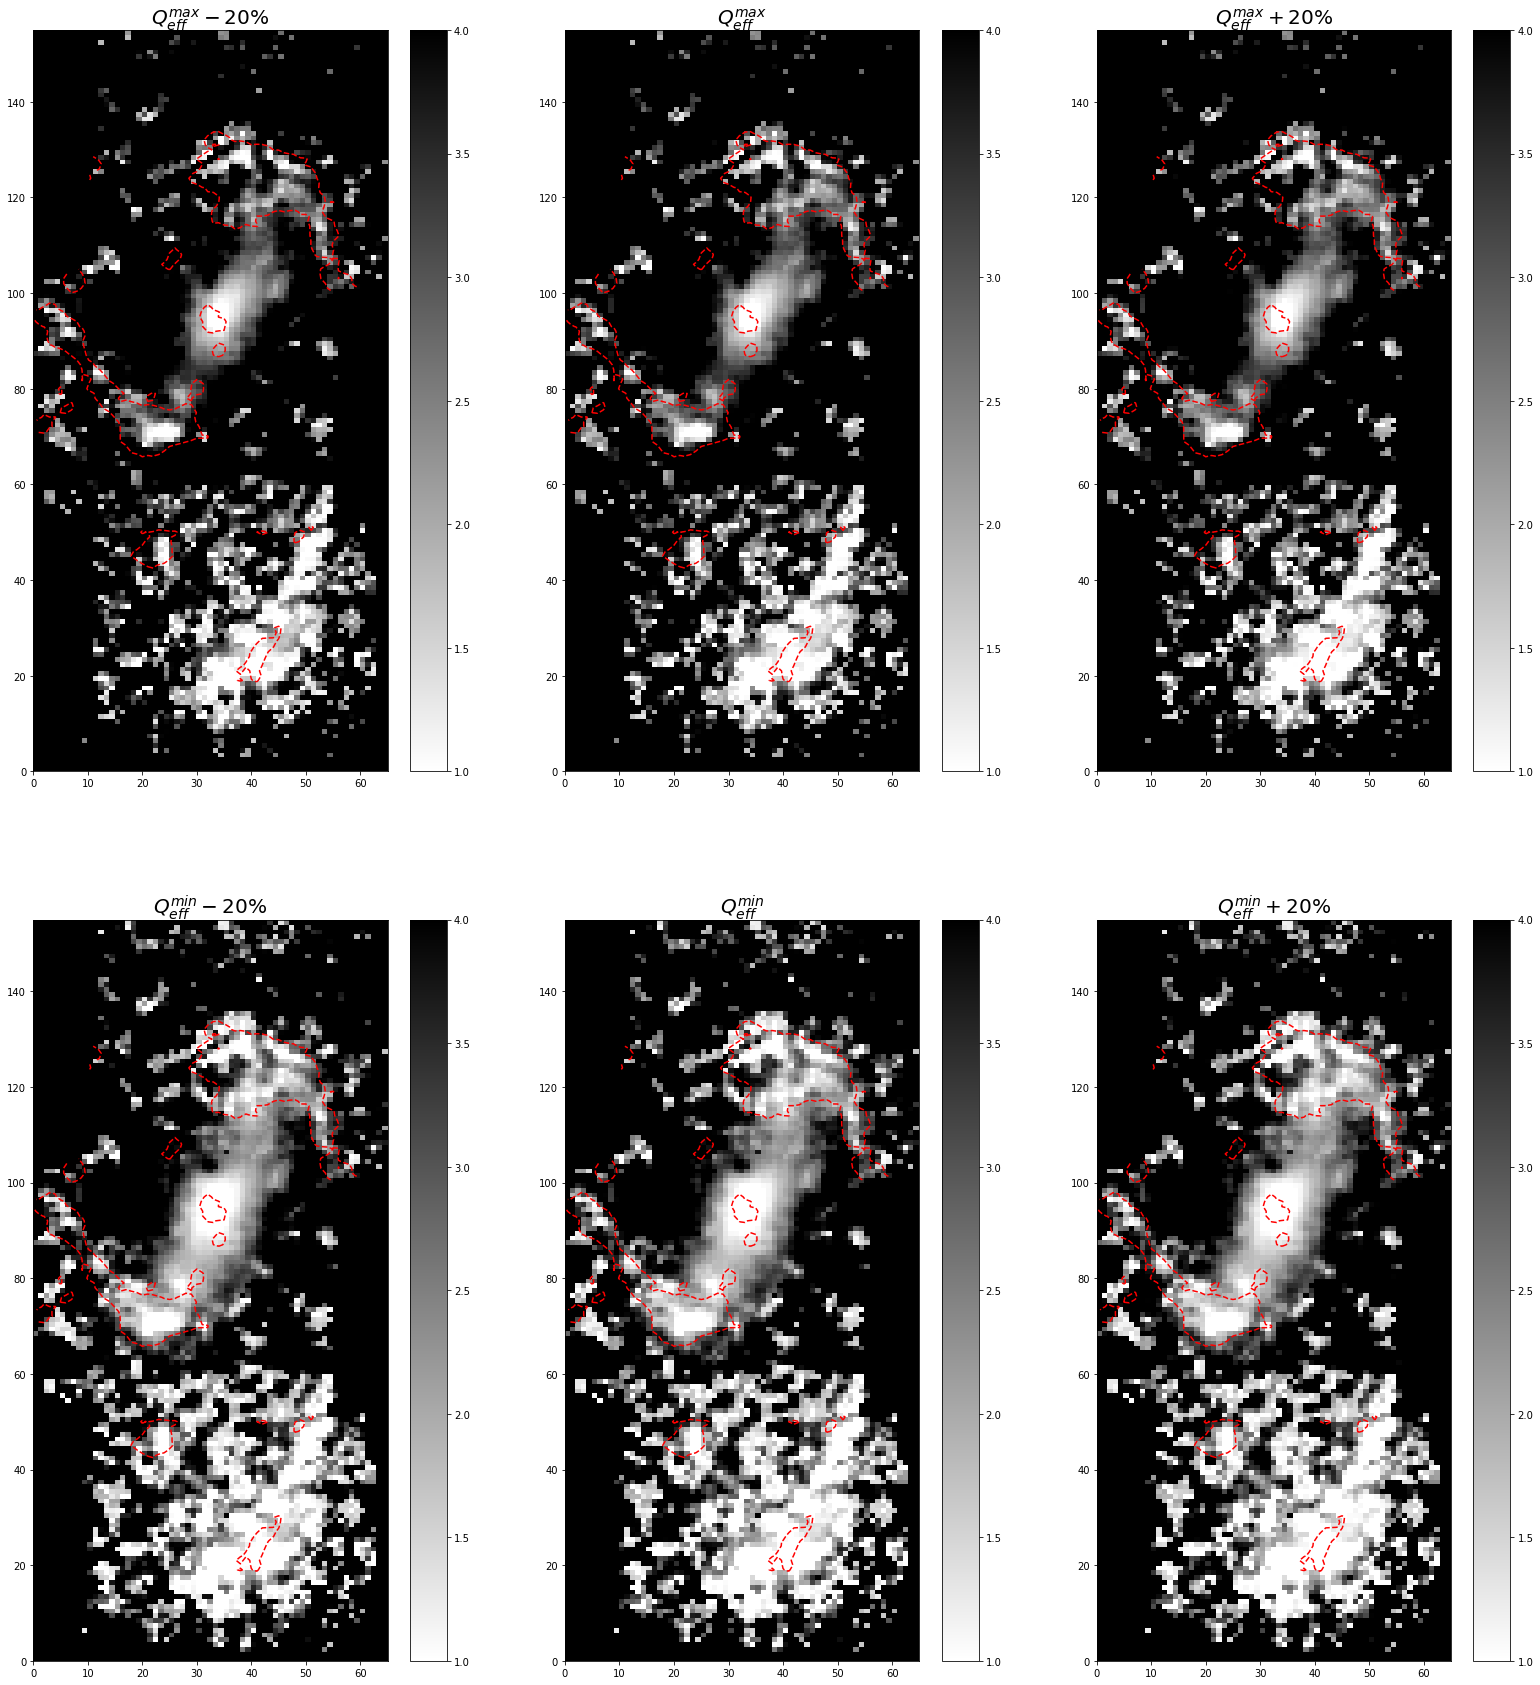

In [141]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[27, 30])
plt.subplot(2,3,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max_twenty_down, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}-20\%$', fontsize=20)

plt.subplot(2,3,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)

plt.subplot(2,3,3)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max_twenty_up, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}+20\%$', fontsize=20)

plt.subplot(2,3,4)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min_twenty_down, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}-20\%$', fontsize=20)

plt.subplot(2,3,5)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(2,3,6)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min_twenty_up, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}+20\%$', fontsize=20)

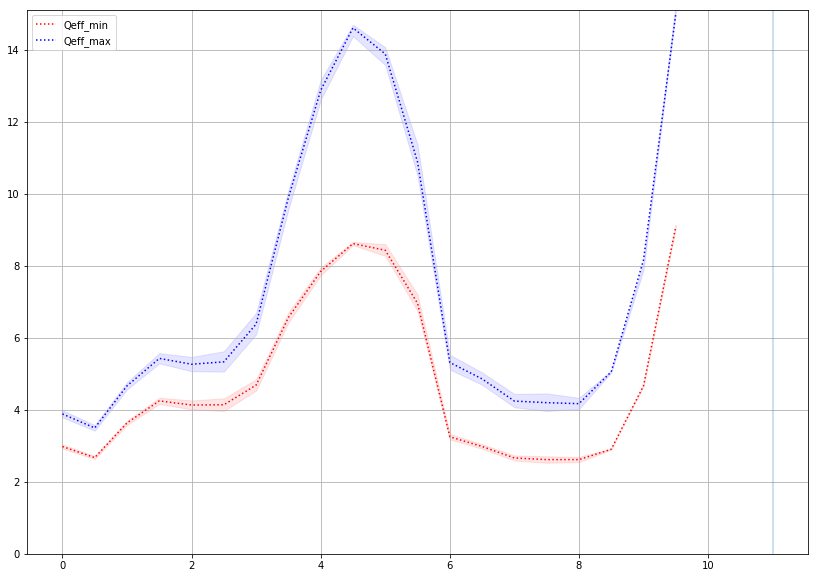

In [146]:
plt.figure(figsize=[14,10])
Qeff_min_az = azimuthal_average(Qeff_min, step=0.5, vmax=10.)[0]
Qeff_min_az_up = azimuthal_average(Qeff_min_twenty_up, step=0.5, vmax=10.)[0]
Qeff_min_az_down = azimuthal_average(Qeff_min_twenty_down, step=0.5, vmax=10.)[0]
Qeff_max_az = azimuthal_average(Qeff_max, step=0.5, vmax=10.)[0]
Qeff_max_az_up = azimuthal_average(Qeff_max_twenty_up, step=0.5, vmax=10.)[0]
Qeff_max_az_down = azimuthal_average(Qeff_max_twenty_down, step=0.5, vmax=10.)[0]

plt.plot(np.array(np.arange(0,10.,0.5)),Qeff_min_az, ':', label='Qeff_min', color='red')
plt.fill_between(np.array(np.arange(0,10.,0.5)), 
                     np.array(Qeff_min_az_up), 
                     np.array(Qeff_min_az_down), alpha=0.1, color='red') 

plt.plot(np.array(np.arange(0,10.,0.5)),Qeff_max_az, ':', label='Qeff_max', color='blue')
plt.fill_between(np.array(np.arange(0,10.,0.5)), 
                     np.array(Qeff_max_az_up), 
                     np.array(Qeff_max_az_down), alpha=0.1, color='blue') 


plt.grid()
plt.legend()
plt.axvline(x=11., alpha=0.3)
plt.ylim(0, 15.1);

In [153]:
sig_R_max_ten_up = 1.2 * sig_R_max 
sig_R_max_ten_down = 0.8 * sig_R_max 
sig_R_min_ten_up = 1.2 * sig_R_min 
sig_R_min_ten_down = 0.8 * sig_R_min 

In [154]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
Qeff_max_ten_up = np.zeros(dist_kpc.shape)
Qeff_max_ten_down = np.zeros(dist_kpc.shape)
Qeff_min_ten_up = np.zeros(dist_kpc.shape)
Qeff_min_ten_down = np.zeros(dist_kpc.shape)
bark = np.zeros(dist_kpc.shape)
bark_max = np.zeros(dist_kpc.shape)
Qg = np.zeros(dist_kpc.shape)
Qs_min = np.zeros(dist_kpc.shape)
Qs_max = np.zeros(dist_kpc.shape)
Sigma_g = np.zeros(dist_kpc.shape)

step = 0
errors = 0
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max_ten_up[i][j]
        s_R_min = sig_R_min_ten_up[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min_ten_up[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max_ten_up[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
        
        
print('Errors:{}'.format(errors))

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Errors:4704


In [155]:
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max_ten_down[i][j]
        s_R_min = sig_R_min_ten_down[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min_ten_down[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max_ten_down[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
        
        
print('Errors:{}'.format(errors))

11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
Errors:9408


Text(0.5, 1.0, '$Q_{eff}^{min}+10\\%$')

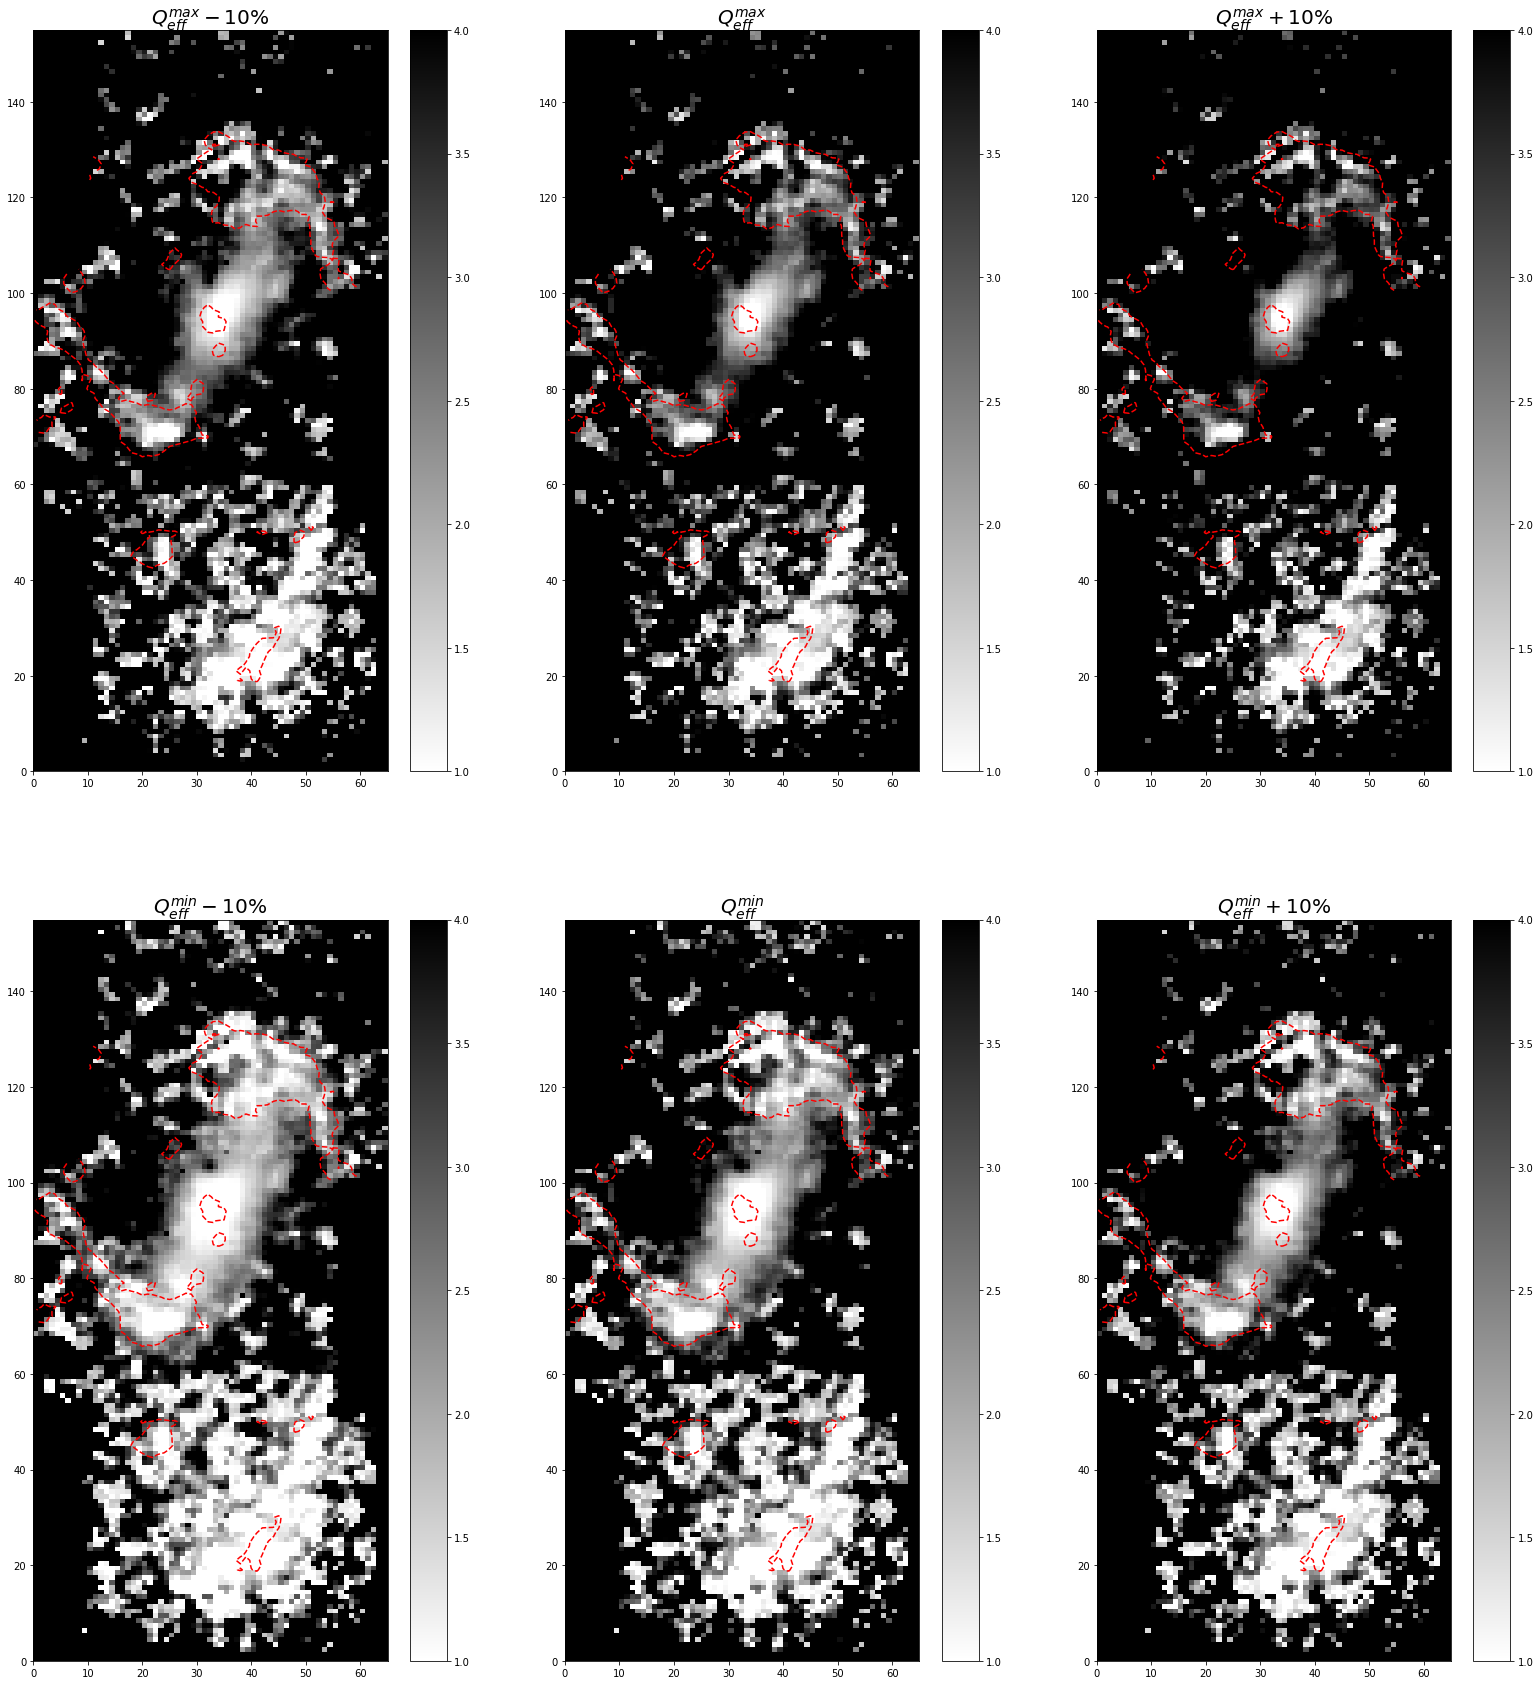

In [156]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[27, 30])
plt.subplot(2,3,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max_ten_down, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}-10\%$', fontsize=20)

plt.subplot(2,3,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)

plt.subplot(2,3,3)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max_ten_up, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}+10\%$', fontsize=20)

plt.subplot(2,3,4)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min_ten_down, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}-10\%$', fontsize=20)

plt.subplot(2,3,5)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(2,3,6)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min_ten_up, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}+10\%$', fontsize=20)

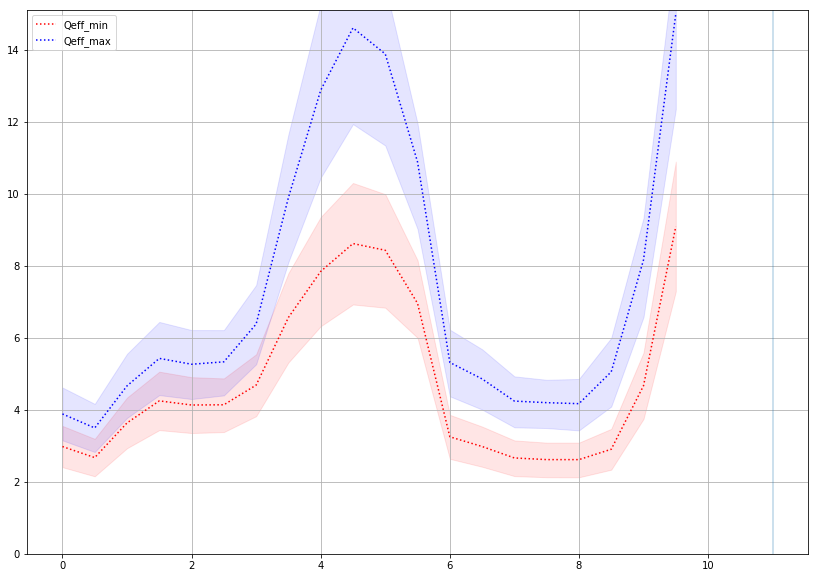

In [157]:
plt.figure(figsize=[14,10])
Qeff_min_az = azimuthal_average(Qeff_min, step=0.5, vmax=10.)[0]
Qeff_min_az_up = azimuthal_average(Qeff_min_ten_up, step=0.5, vmax=10.)[0]
Qeff_min_az_down = azimuthal_average(Qeff_min_ten_down, step=0.5, vmax=10.)[0]
Qeff_max_az = azimuthal_average(Qeff_max, step=0.5, vmax=10.)[0]
Qeff_max_az_up = azimuthal_average(Qeff_max_ten_up, step=0.5, vmax=10.)[0]
Qeff_max_az_down = azimuthal_average(Qeff_max_ten_down, step=0.5, vmax=10.)[0]

plt.plot(np.array(np.arange(0,10.,0.5)),Qeff_min_az, ':', label='Qeff_min', color='red')
plt.fill_between(np.array(np.arange(0,10.,0.5)), 
                     np.array(Qeff_min_az_up), 
                     np.array(Qeff_min_az_down), alpha=0.1, color='red') 

plt.plot(np.array(np.arange(0,10.,0.5)),Qeff_max_az, ':', label='Qeff_max', color='blue')
plt.fill_between(np.array(np.arange(0,10.,0.5)), 
                     np.array(Qeff_max_az_up), 
                     np.array(Qeff_max_az_down), alpha=0.1, color='blue') 


plt.grid()
plt.legend()
plt.axvline(x=11., alpha=0.3)
plt.ylim(0, 15.1);